#### @author: Прядун Михаил Александрович ЭУМ-110001
<hr>

## Задание 6 (Анализ данных на Python - части 1-2)

In [61]:
import pandas as pd    # импорт библиотеки

# зададим имя файла с пропущенными данными (лежит в той же папке)
in_file_name = 'dataset_2_outliers.csv'
df_in = pd.read_csv(in_file_name, sep = ';')
df_in.date = pd.to_datetime(df_in.date, format = '%d.%m.%Y')

In [62]:
df_in.head(3)    # выведем данные на экран - первые три строки

,date,avg_salary,avg_pension,avg_card_spend
0,2015-01-15,19209,8831,7927
1,2015-02-15,25356,10451,7605
2,2015-03-15,24159,10284,8600


In [63]:
# импорт графических библиотек
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

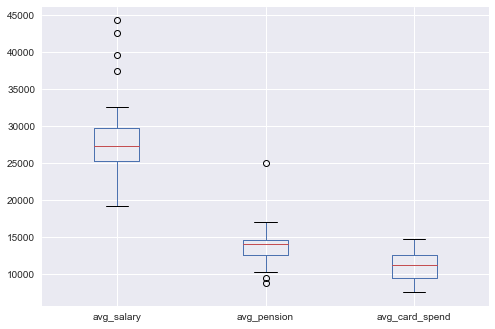

In [64]:
_, bp_axes = df_in.boxplot(column=['avg_salary', 'avg_pension', 'avg_card_spend'], return_type='both')    # график и данные

In [65]:
outliers_list = [flier.get_ydata() for flier in bp_axes["fliers"]]    # выбросы
print(outliers_list)    # выведем все на экран
print("avg_pension outliers: ",list(outliers_list[1]))    # выбросы конкретно по "avg_pension"

[array([37467, 39630, 42513, 44268], dtype=object), array([8831, 9496, 25044], dtype=object), array([], dtype=object)]
avg_pension outliers:  [8831, 9496, 25044]


In [68]:
def check_outliers(data_in, data_index):
    import numpy as np    # импорт библиотеки
    data_out = data_in.copy()    # сделаем копию исходных данных и из нее сделаем массив на выход
    for index, value in enumerate(data_out): 
        if value in list(outliers_list[data_index]):
            data_out[index] = np.nan
    return(data_out)  # выбросы конкретно по "avg_pension"

df_in['avg_salary_check_outliers'] = list(check_outliers(df_in.avg_salary, 0))
df_in['avg_pension_check_outliers'] = list(check_outliers(df_in.avg_pension, 1))
df_in['avg_card_spend_check_outliers'] = list(check_outliers(df_in.avg_card_spend, 2))


In [69]:
df_in.loc[45:50]

,date,avg_salary,avg_pension,avg_card_spend,avg_salary_check_outliers,avg_pension_check_outliers,avg_card_spend_check_outliers
45,2018-10-15,30497,15621,13659,30497.0,15621.0,13659
46,2018-11-15,31997,14512,13012,31997.0,14512.0,13012
47,2018-12-15,44268,25044,14747,NaN,NaN,14747
48,2019-01-15,25674,12607,12280,25674.0,12607.0,12280


In [70]:
def change_outliers(data_in):
    import math
    data_out = data_in.copy()    # сделаем копию исходных данных и из нее сделаем массив на выход
    index_nan = []
    len_data = len(data_out) - 1 
    for index, value in enumerate(data_out):
        if (math.isnan(value)):
            index_nan.append(index)
    
    list_tmp = []
    for value in index_nan:
        if len(list_tmp) == 0:
            list_tmp.append([value])
            continue
        if value - 1 == list_tmp[-1][-1]:
            list_tmp[-1].append(value)
        else: 
            list_tmp.append([value])
    
    for value in list_tmp:
        initial = data_out[value[0]-1]  #Обработка средних элементов NaN
        finaly = data_out[value[-1]+1]
        difference = initial - finaly
        lenght = len(value) + 1
        step = difference / lenght 
        for i in range(lenght-1):
            price = initial - step*(i+1)
            data_out[value[i]] = round(price,2) 
    return(data_out)  # выбросы конкретно по "avg_pension"

df_test = df_in.copy()
print(list(change_outliers(df_test.avg_salary_check_outliers)))


[19209.0, 25356.0, 24159.0, 27430.0, 24726.0, 27387.0, 27372.0, 24915.0, 23616.0, 24943.0, 25034.0, 22397.0, 19760.0, 26279.0, 25465.0, 28096.0, 25785.0, 29226.0, 27309.0, 26138.0, 25292.0, 25034.0, 26843.0, 23734.5, 20626.0, 27635.0, 27086.0, 27848.0, 27844.0, 31040.0, 29119.0, 27730.0, 26935.0, 27878.0, 29497.0, 26484.0, 23471.0, 31087.0, 29799.0, 30914.0, 26519.0, 32646.0, 31752.0, 30510.0, 28198.0, 30497.0, 31997.0, 28835.5, 25674.0]


In [77]:
df_test['avg_salary_check_outliers'] = list(change_outliers(df_test.avg_salary_check_outliers))
df_test['avg_pension_check_outliers'] = list(change_outliers(df_test.avg_pension_check_outliers))
df_test['avg_card_spend_check_outliers'] = list(change_outliers(df_test.avg_card_spend_check_outliers))
df_test

,date,avg_salary,avg_pension,avg_card_spend,avg_salary_check_outliers,avg_pension_check_outliers,avg_card_spend_check_outliers
0,2015-01-15,19209,8831,7927,25356.0,11817.0,7927
1,2015-02-15,25356,10451,7605,25356.0,11817.0,7605
2,2015-03-15,24159,10284,8600,24159.0,11817.0,8600
3,2015-04-15,27430,11135,8085,27430.0,11817.0,8085
4,2015-05-15,24726,9496,8413,24726.0,11817.0,8413
5,2015-06-15,27387,10361,8748,27387.0,11817.0,8748
6,2015-07-15,27372,11083,9353,27372.0,11817.0,9353
7,2015-08-15,24915,10922,9504,24915.0,11817.0,9504
8,2015-09-15,23616,10828,8925,23616.0,11817.0,8925
9,2015-10-15,24943,10991,9417,24943.0,11817.0,9417
